# Deck 110 ID Experiment

(combine with result of 195)

In [1]:
from erddapy import ERDDAP
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from requests.exceptions import HTTPError


In [2]:
server_url = 'http://akutan.pmel.noaa.gov:8080/erddap'

In [3]:
e = ERDDAP(server=server_url)
# searchterm mooring... subset this later
df = pd.read_csv(e.get_search_url(response='csv', search_for='ICOADS'))

In [4]:
print(df['Dataset ID'].values)

['datasets_IMMA_ICOADS_ncei_1600s' 'datasets_IMMA_ICOADS_ncei_1700s'
 'datasets_IMMA_ICOADS_ncei_1800s' 'datasets_IMMA_ICOADS_ncei_1900s'
 'datasets_IMMA_ICOADS_ncei_1910s' 'datasets_IMMA_ICOADS_ncei_1920s'
 'datasets_IMMA_ICOADS_ncei_1930s' 'datasets_IMMA_ICOADS_ncei_1940s'
 'datasets_IMMA_ICOADS_ncei_1950s' 'datasets_IMMA_ICOADS_ncei_1960s'
 'datasets_IMMA_ICOADS_ncei_1970s' 'datasets_IMMA_ICOADS_ncei_1980s'
 'datasets_IMMA_ICOADS_ncei_1990s' 'datasets_IMMA_ICOADS_ncei_2000s'
 'datasets_IMMA_ICOADS_ncei_2010s']


In [38]:
kw = {
}

constraints = {
    'DCK=~': "110",
}


In [39]:
temp_data = ['datasets_IMMA_ICOADS_ncei_1940s']

In [40]:
for dataset_id in temp_data:
        #read and import dataset
        print(dataset_id)
        try:
            d = ERDDAP(server=server_url,
                protocol='tabledap',
                response='csv',
            )
            d.constraints=constraints
            d.dataset_id=dataset_id
            
            print(d.get_download_url())
        except HTTPError:
            print('Failed to generate url {}'.format(dataset_id))

        try:
            df_m = d.to_pandas(
                        #index_col='time (UTC)',
                        parse_dates=True,
                        skiprows=(1,)  # units information can be dropped.
                        )
            df_m.sort_index(inplace=True)
            df_m.columns = [x[1].split()[0] for x in enumerate(df_m.columns)]
            df_m['ID'] = df_m['ID'].astype(str)

        except:
            print(f"something failed in data download {dataset_id}")
            pass

datasets_IMMA_ICOADS_ncei_1940s
http://akutan.pmel.noaa.gov:8080/erddap/tabledap/datasets_IMMA_ICOADS_ncei_1940s.csv?&DCK=~"110"


In [41]:
# load clean deck195

dck_195 = pd.read_csv('Deck195_CleanID.csv')

## plot of daily observations (or weekly, monthly, etc) to look for the following artifact

For operational security the Navy issued new rules for log-keeping in October 1942. From this date to ~June 1944 the Navigation data was not included in the deck log. Rather, it was in the header of a separate 'War Diary' -- basically the same as the old 'Remarks' page, but handled differently. 

This lasted until about June 1944, when the old ways returned. 

The questions: is there a corresponding hole in Deck 195 (Nov 1942-June 1944)? If not are the positions only given in whole degrees? Or does it look normal? 

I think we could plot the total number of obs reported per day to get a first look?



In [42]:
df_m = df_m.set_index(pd.DatetimeIndex(df_m['time']))

In [43]:
dfg = df_m.groupby(df_m.index.year)

In [44]:
for years in dfg.groups.keys():
    dfy = dfg.get_group(years)
    for months in (dfy.groupby(dfy.index.dayofyear)).groups.keys():
        print(f'{years}, {months}, {(dfy.groupby(dfy.index.dayofyear)).get_group(months).time.count()}')

1945, 15, 10
1945, 16, 20
1945, 17, 23
1945, 18, 40
1945, 19, 41
1945, 20, 25
1945, 21, 23
1945, 22, 24
1945, 23, 27
1945, 24, 37
1945, 25, 32
1945, 26, 21
1945, 27, 17
1945, 28, 17
1945, 29, 9
1945, 31, 7
1945, 32, 22
1945, 33, 34
1945, 34, 33
1945, 35, 34
1945, 36, 10
1945, 37, 13
1945, 38, 30
1945, 39, 37
1945, 40, 57
1945, 41, 33
1945, 42, 2
1945, 43, 36
1945, 44, 35
1945, 45, 32
1945, 46, 34
1945, 47, 52
1945, 48, 56
1945, 49, 46
1945, 50, 13
1945, 51, 20
1945, 52, 29
1945, 53, 40
1945, 54, 56
1945, 55, 65
1945, 56, 48
1945, 57, 43
1945, 58, 44
1945, 59, 72
1945, 60, 135
1945, 61, 103
1945, 62, 107
1945, 63, 159
1945, 64, 168
1945, 65, 162
1945, 66, 163
1945, 67, 166
1945, 68, 178
1945, 69, 178
1945, 70, 133
1945, 71, 136
1945, 72, 182
1945, 73, 173
1945, 74, 189
1945, 75, 150
1945, 76, 146
1945, 77, 151
1945, 78, 139
1945, 79, 180
1945, 80, 265
1945, 81, 260
1945, 82, 275
1945, 83, 249
1945, 84, 233
1945, 85, 203
1945, 86, 245
1945, 87, 295
1945, 88, 261
1945, 89, 223
1945, 90, 2

In [60]:
obs_195 = pd.read_csv('195doyobs.csv',header=None)
obs_110 = pd.read_csv('110doyobs.csv',header=None)

In [66]:
obs_110

,0,1,2,datetime
0,1945,15,10,1941-12-31 00:00:00
1,1945,16,20,1942-01-01 00:00:00
2,1945,17,23,1942-01-02 00:00:00
3,1945,18,40,1942-01-03 00:00:00
4,1945,19,41,1942-01-04 00:00:00
...,...,...,...,...
1798,1949,354,9,NaN
1799,1949,355,9,NaN
1800,1949,356,9,NaN
1801,1949,357,9,NaN


In [69]:
obs_110['datetime'] = np.nan
for value, row in obs_110.iterrows():
    obs_110['datetime'][value] = pd.to_datetime(str(int(row[0]))+' '+str(int(row[1])), format='%Y %j')

<ipython-input-69-fc09cd63a83c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs_110['datetime'][value] = pd.to_datetime(str(int(row[0]))+' '+str(int(row[1])), format='%Y %j')


In [70]:
obs_195['datetime'] = np.nan
for value, row in obs_195.iterrows():
    obs_195['datetime'][value] = pd.to_datetime(str(int(row[0]))+' '+str(int(row[1])), format='%Y %j')

<ipython-input-70-b334b1a12b6c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs_195['datetime'][value] = pd.to_datetime(str(int(row[0]))+' '+str(int(row[1])), format='%Y %j')


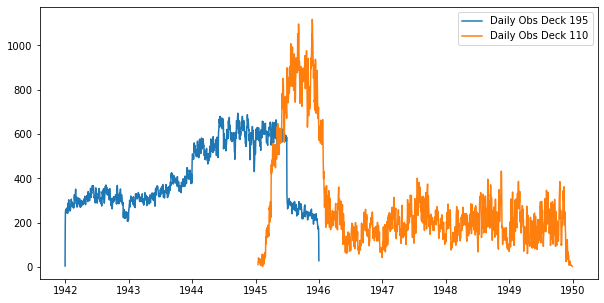

In [74]:
fig, ax = plt.subplots(1,1, figsize=(10, 5), facecolor='w', edgecolor='k')

plt.plot(obs_195.datetime,obs_195[2],label='Daily Obs Deck 195')
plt.plot(obs_110.datetime,obs_110[2],label='Daily Obs Deck 110')
plt.legend()